x=[ 0.   0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  1.   1.1  1.2  1.3
  1.4  1.5  1.6  1.7  1.8  1.9  2.   2.1  2.2  2.3  2.4  2.5  2.6  2.7
  2.8  2.9  3.   3.1  3.2  3.3  3.4  3.5  3.6  3.7  3.8  3.9  4.   4.1
  4.2  4.3  4.4  4.5  4.6  4.7  4.8  4.9  5.   5.1  5.2  5.3  5.4  5.5
  5.6  5.7  5.8  5.9  6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9
  7.   7.1  7.2  7.3  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3
  8.4  8.5  8.6  8.7  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7
  9.8  9.9 10.  10.1 10.2 10.3 10.4]
对应的数值解y=[[0.         0.09900996 0.19230775 0.2752294  0.34482762 0.40000004
  0.44117651 0.46979872 0.48780495 0.49723764 0.50000005 0.49773759
  0.49180331 0.48327139 0.47297298 0.46153847 0.44943821 0.437018
  0.42452831 0.41214752 0.40000002 0.38817007 0.37671235 0.3656598
  0.35502961 0.34482761 0.33505157 0.32569362 0.31674209 0.30818279
  0.30000001 0.2921772  0.28469751 0.27754416 0.27070064 0.26415095
  0.25787966 0.25187202 0.24611399 0.24059223 0.235

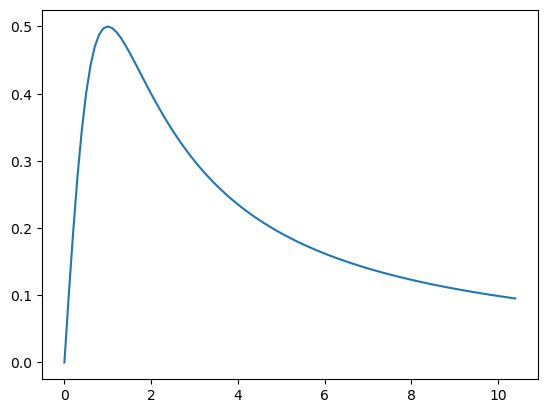

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.integrate import odeint
dy = lambda y,x: 1/(1 + x**2) - 2*y**2

x = np.arange(0, 10.5, 0.1)
sol = odeint(dy, 0, x)
print("x={}\n对应的数值解y={}".format(x,sol.T))
plt.plot(x,sol)
plt.show()

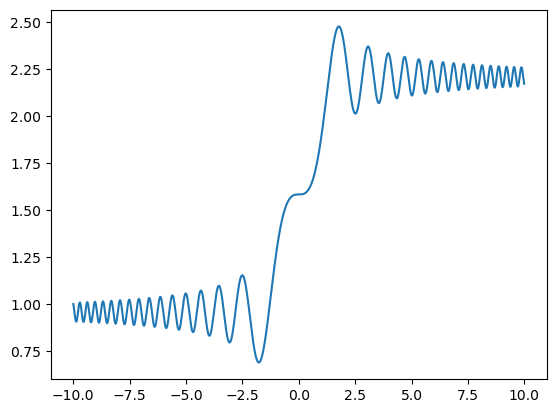

In [2]:
def dy_dt(y,t):
    return np.sin(t**2)
y0=[1]
t = np.arange(-10,10,0.01)
y=odeint(dy_dt,y0,t)
plt.plot(t, y)
plt.show()

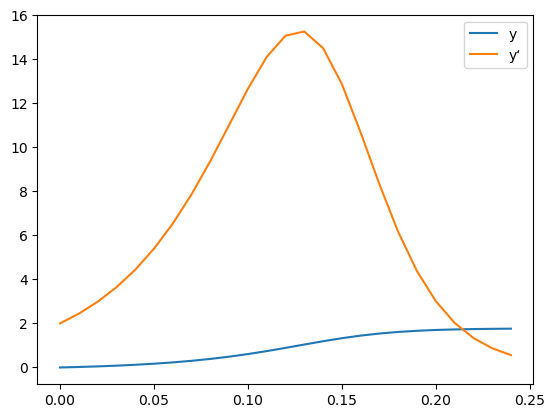

In [3]:
# odeint是通过把二阶微分转化为一个方程组的形式求解高阶方程的
# y''=20(1-y^2)y'-y
def fvdp(y,t):
    '''
    要把y看出一个向量，y = [dy0,dy1,dy2,...]分别表示y的n阶导，那么
    y[0]就是需要求解的函数，y[1]表示一阶导，y[2]表示二阶导，以此类推
    '''
    dy1 = y[1]      # y[1]=dy/dt，一阶导                     y[0]表示原函数
    dy2 = 20*(1-y[0]**2) * y[1] - y[0]                    # y[1]表示一阶微分
    # y[0]是最初始，也就是需要求解的函数
    # 注意返回的顺序是[一阶导， 二阶导]，这就形成了一阶微分方程组
    return [dy1, dy2] 
    
# 求解的是一个二阶微分方程，所以输入的时候同时输入原函数y和微分y'
# y[0]表示原函数， y[1]表示一阶微分
# dy1表示一阶微分， dy2表示的是二阶微分
# 可以发现，dy1和y[1]表示的是同一个东西
# 把y''分离变量分离出来： dy2=20*(1-y[0]**2)*y[1]-y[0]
def solve_second_order_ode():
    '''
    求解二阶ODE
    '''
    x = np.arange(0,0.25,0.01)#给x规定范围
    y0 = [0.0, 2.0] # 初值条件
    # 初值[3.0, -5.0]表示y(0)=3,y'(0)=-5
    # 返回y，其中y[:,0]是y[0]的值，就是最终解，y[:,1]是y'(x)的值
    y = odeint(fvdp, y0, x)
    
    y1, = plt.plot(x,y[:,0],label='y')
    y1_1, = plt.plot(x,y[:,1],label='y‘')             
    plt.legend(handles=[y1,y1_1])   #创建图例
    
    plt.show()
solve_second_order_ode()


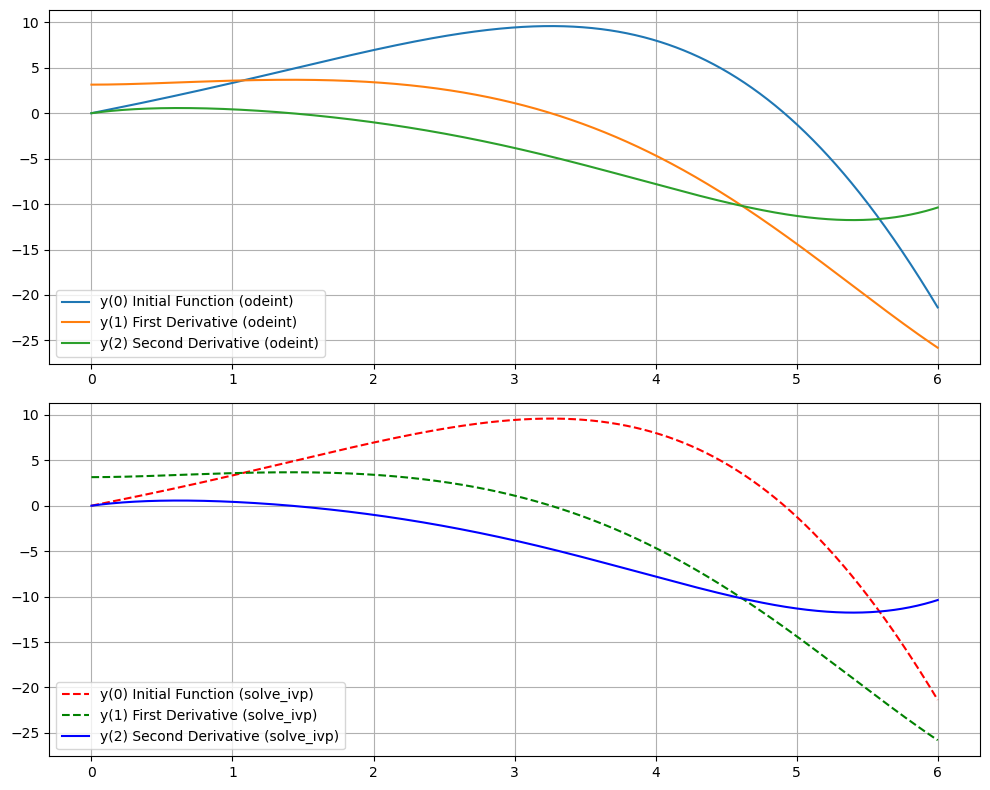

In [10]:
import numpy as np
from scipy.integrate import odeint, solve_ivp
import matplotlib.pyplot as plt

pi = np.pi

# 用于 odeint 的函数
def f_odeint(y, t):
    dy1 = y[1]  # First derivative
    dy2 = y[2]  # Second derivative
    dy3 = -y[0] + y[1] - y[2] - np.cos(t)  # Third derivative
    return [dy1, dy2, dy3]

# 用于 solve_ivp 的函数
def f_solve_ivp(t, y):
    dy1 = y[1]  # First derivative
    dy2 = y[2]  # Second derivative
    dy3 = -y[0] + y[1] - y[2] - np.cos(t)  # Third derivative
    return [dy1, dy2, dy3]

def solve_high_order_ode():
    '''
    求解高阶ODE
    '''
    t = np.linspace(0, 6, 1000)
    tspan = (0.0, 6.0)
    y0 = [0.0, pi, 0.0]  # 初始条件: y(0)=0, y'(0)=π, y''(0)=0

    # 使用 odeint 求解
    y_odeint = odeint(f_odeint, y0, t)

    # 使用 solve_ivp 求解
    sol = solve_ivp(f_solve_ivp, t_span=tspan, y0=y0, t_eval=t)  # Ensure the correct function is used here

    plt.figure(figsize=(10, 8))

    plt.subplot(211)
    plt.plot(t, y_odeint[:, 0], label='y(0) Initial Function (odeint)')
    plt.plot(t, y_odeint[:, 1], label='y(1) First Derivative (odeint)')
    plt.plot(t, y_odeint[:, 2], label='y(2) Second Derivative (odeint)')
    plt.legend()
    plt.grid(True)

    plt.subplot(212)
    plt.plot(sol.t, sol.y[0], 'r--', label='y(0) Initial Function (solve_ivp)')
    plt.plot(sol.t, sol.y[1], 'g--', label='y(1) First Derivative (solve_ivp)')
    plt.plot(sol.t, sol.y[2], 'b-', label='y(2) Second Derivative (solve_ivp)')
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

solve_high_order_ode()

e:\IDEA\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 26102 (\N{CJK UNIFIED IDEOGRAPH-65F6}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
e:\IDEA\ProgramData\anaconda3\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 38388 (\N{CJK UNIFIED IDEOGRAPH-95F4}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


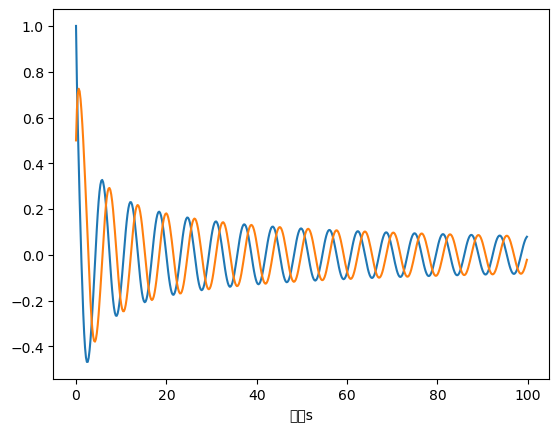

In [11]:
def fun(t, w):
    x = w[0]
    y = w[1]
    return [-x**3-y,-y**3+x]
# 初始条件
y0 = [1,0.5]
yy = solve_ivp(fun, (0,100), y0, method='RK45',t_eval = np.arange(0,100,0.2) )
t = yy.t
data = yy.y
plt.plot(t, data[0, :])
plt.plot(t, data[1, :])
plt.xlabel("时间s")
plt.show()


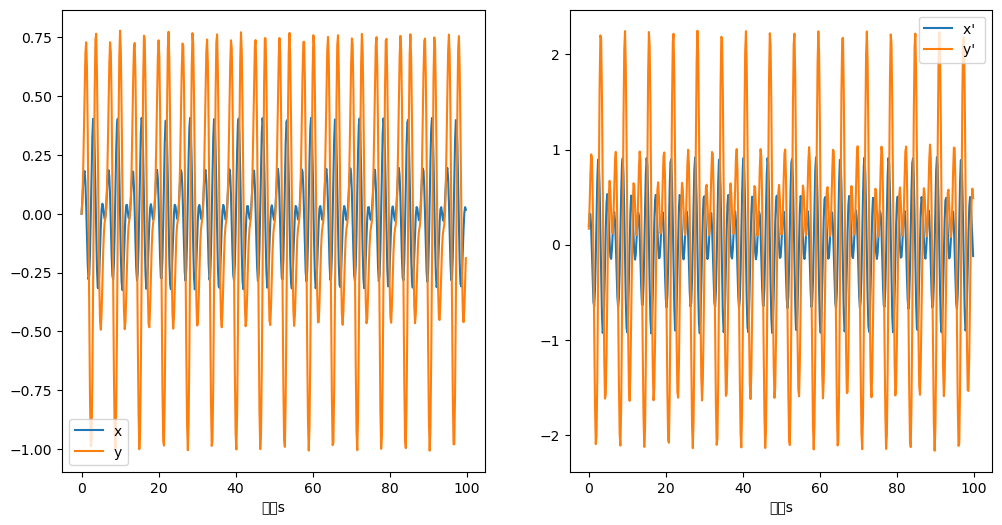

In [12]:
def fun(t, w):
    x = w[0]
    y = w[1]
    dx = w[2]
    dy = w[3]
    # 求导以后[x,y,dx,dy]变为[dx,dy,d2x,d2y]
    # d2x为w[2]，d2y为w[5]
    return [dx,dy,-dy-3*x+np.cos(2*t),4*dx-3*y+np.sin(2*t)]
# 初始条件
y0 = [0,0,1/5,1/6]
yy = solve_ivp(fun, (0,100), y0, method='RK45',t_eval = np.arange(0,100,0.2) )
t = yy.t
data = yy.y
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.plot(t, data[0, :])
plt.plot(t, data[1, :])
plt.legend(['x','y'])
plt.xlabel("时间s")
plt.subplot(1,2,2)
plt.plot(t, data[2, :])
plt.plot(t, data[3, :])
plt.legend(["x' ","y' "])
plt.xlabel("时间s")
plt.show()

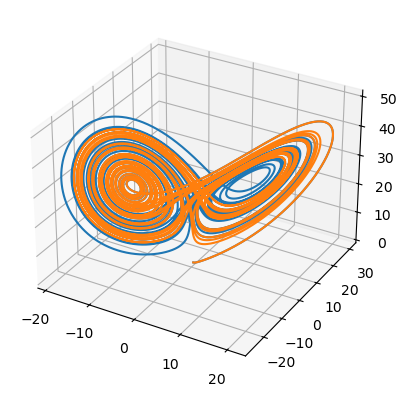

In [13]:
import numpy as np
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
def dmove(Point, t, sets):
    p, r, b = sets
    x, y, z = Point
    return np.array([p*(y-x), x*(r-z), x*y-b*z])
t = np.arange(0, 30, 0.001)
P1 = odeint(dmove, (0., 1., 0.), t, args=([10., 28., 3.],))
P2 = odeint(dmove, (0., 1.01, 0.), t, args=([10., 28., 3.],)) 
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(P1[:,0], P1[:,1], P1[:,2])
ax.plot(P2[:,0], P2[:,1], P2[:,2])
plt.show()